In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pr(paths, labels):
    plt.figure(figsize=(10, 4), tight_layout=True)
    for path, label in zip(paths, labels):
        pr_table = pd.read_csv('matrix/' + path)
        plt.subplot(1, 2, 1)
        plt.plot(pr_table['conf'], pr_table['p'], label=label, linewidth=2)

        plt.subplot(1, 2, 2)
        plt.plot(pr_table['conf'], pr_table['r'], label=label, linewidth=2)

    plt.subplot(1, 2, 1)
    plt.xlabel('Confidence')
    plt.ylabel('Precision')
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Confidence')
    plt.ylabel('Recall')
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.legend()

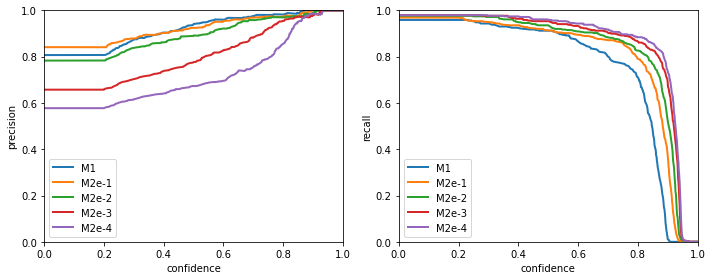

In [34]:
paths = ['m1.csv', '2e_5.csv', '2e_10.csv', '2e_15.csv', '2e_20.csv']
labels = ['M1', 'M2e-1', 'M2e-2', 'M2e-3', 'M2e-4']

plot_pr(paths, labels)